In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

* imports essential libraries from Keras and TensorFlow for building and training deep learning models, including functions for image processing and model construction.

In [2]:
train_data_dir = r'C:\Users\haris\OneDrive\Desktop\Computer Vision\train'
test_data_dir = r'C:\Users\haris\OneDrive\Desktop\Computer Vision\test'

* Imported Training and Testing Data

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

* The createdataframe function creates a list of image file paths and their corresponding labels from a specified directory, which is structured with subdirectories for each label
* It iterates through each label directory, collecting paths of images and appending the label to a list, allowing for easy association between images and their respective categories.

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(train_data_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)


                                                   image     label
0      C:\Users\haris\OneDrive\Desktop\Computer Visio...     angry
1      C:\Users\haris\OneDrive\Desktop\Computer Visio...     angry
2      C:\Users\haris\OneDrive\Desktop\Computer Visio...     angry
3      C:\Users\haris\OneDrive\Desktop\Computer Visio...     angry
4      C:\Users\haris\OneDrive\Desktop\Computer Visio...     angry
...                                                  ...       ...
28704  C:\Users\haris\OneDrive\Desktop\Computer Visio...  surprise
28705  C:\Users\haris\OneDrive\Desktop\Computer Visio...  surprise
28706  C:\Users\haris\OneDrive\Desktop\Computer Visio...  surprise
28707  C:\Users\haris\OneDrive\Desktop\Computer Visio...  surprise
28708  C:\Users\haris\OneDrive\Desktop\Computer Visio...  surprise

[28709 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(test_data_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test['image'])

                                                  image     label
0     C:\Users\haris\OneDrive\Desktop\Computer Visio...     angry
1     C:\Users\haris\OneDrive\Desktop\Computer Visio...     angry
2     C:\Users\haris\OneDrive\Desktop\Computer Visio...     angry
3     C:\Users\haris\OneDrive\Desktop\Computer Visio...     angry
4     C:\Users\haris\OneDrive\Desktop\Computer Visio...     angry
...                                                 ...       ...
7173  C:\Users\haris\OneDrive\Desktop\Computer Visio...  surprise
7174  C:\Users\haris\OneDrive\Desktop\Computer Visio...  surprise
7175  C:\Users\haris\OneDrive\Desktop\Computer Visio...  surprise
7176  C:\Users\haris\OneDrive\Desktop\Computer Visio...  surprise
7177  C:\Users\haris\OneDrive\Desktop\Computer Visio...  surprise

[7178 rows x 2 columns]
0       C:\Users\haris\OneDrive\Desktop\Computer Visio...
1       C:\Users\haris\OneDrive\Desktop\Computer Visio...
2       C:\Users\haris\OneDrive\Desktop\Computer Visio...
3       C

In [8]:
from tqdm.notebook import tqdm


In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

* The extract_features function extracts and processes image features from a list of image file paths, converting them into a standardized format for model input.
* It utilizes load_img to load each image in grayscale mode and then converts the loaded image to a NumPy array for further processing.
* After collecting all image arrays in a list, the function reshapes the resulting NumPy array to have dimensions compatible with model input, specifically reshaping it to (number of images, 48, 48, 1) to denote height, width, and channel for grayscale images.

In [10]:
train_features = extract_features(train['image']) 


  0%|          | 0/28709 [00:00<?, ?it/s]

C:\Users\haris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


* The code calls the extract_features function to process the images listed in the train DataFrame under the 'image' column.

In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

* The code calls the extract_features function to process the images listed in the train DataFrame under the 'image' column.

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

* The code normalizes the training and testing feature arrays (train_features and test_features) by dividing by 255.0. This scales pixel values from the range of 0-255 to a range of 0-1.

In [13]:
from sklearn.preprocessing import LabelEncoder


In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

* The code initializes a LabelEncoder object, which is used to convert categorical labels into a numerical format suitable for machine learning algorithms.

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

* The code uses the to_categorical function from Keras to convert the training labels (y_train) and testing labels (y_test) into one-hot encoded format, which transforms categorical integer labels into binary arrays.

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
# fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

* A sequential neural network model is created using the Sequential class from Keras, allowing for a linear stack of layers.
* Four convolutional layers (Conv2D) are added, each followed by a max pooling layer (MaxPooling2D) and a dropout layer (Dropout) to prevent overfitting. The convolutional layers use ReLU activation and progressively increase the number of filters (32, 64, 128, 256).
* After the convolutional layers, the feature maps are flattened into a 1D array using Flatten(), and a fully connected layer (Dense) with 128 units and ReLU activation is added, followed by another dropout layer.
* The final output layer is a dense layer with 7 units (one for each class) and a softmax activation function, allowing the model to output probability distributions across the seven classes for multi-class classification tasks.

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [19]:
model.fit(x= x_train,y = y_train, batch_size = 64, epochs = 30, validation_data = (x_test,y_test))

Epoch 1/30
449/449 [==============================] - 47s 99ms/step - loss: 1.8125 - accuracy: 0.2493 - val_loss: 1.7680 - val_accuracy: 0.2594
Epoch 2/30
449/449 [==============================] - 49s 109ms/step - loss: 1.6862 - accuracy: 0.3195 - val_loss: 1.5244 - val_accuracy: 0.4075
Epoch 3/30
449/449 [==============================] - 53s 118ms/step - loss: 1.5120 - accuracy: 0.4123 - val_loss: 1.3994 - val_accuracy: 0.4585
Epoch 4/30
449/449 [==============================] - 55s 122ms/step - loss: 1.4209 - accuracy: 0.4498 - val_loss: 1.3289 - val_accuracy: 0.4886
Epoch 5/30
449/449 [==============================] - 56s 124ms/step - loss: 1.3668 - accuracy: 0.4739 - val_loss: 1.2664 - val_accuracy: 0.5109
Epoch 6/30
449/449 [==============================] - 55s 122ms/step - loss: 1.3302 - accuracy: 0.4905 - val_loss: 1.2301 - val_accuracy: 0.5248
Epoch 7/30
449/449 [==============================] - 54s 120ms/step - loss: 1.2948 - accuracy: 0.5038 - val_loss: 1.2036 - val_acc

* Trained the Keras model on the training dataset (x_train and y_train) with 254 batch size with 30 epochs with validation data

In [20]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

C:\Users\haris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


* The model's architecture is converted to a JSON format using the to_json() method, which allows for easy storage and sharing of the model's structure.
* The entire model, including both the architecture and the trained weights, is saved to a file named emotiondetector.h5. This format allows for easy loading and deployment of the model later.

In [21]:
from keras.models import model_from_json

In [22]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [23]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [24]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [25]:
image = r"C:\Users\haris\OneDrive\Desktop\Computer Vision\test\angry\PrivateTest_1623042.jpg"
print("original image is of Angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of Angry


C:\Users\haris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 [==============================] - 3s 3s/step
model prediction is  angry


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of Angry
1/1 [==============================] - 0s 40ms/step
model prediction is  angry


C:\Users\haris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


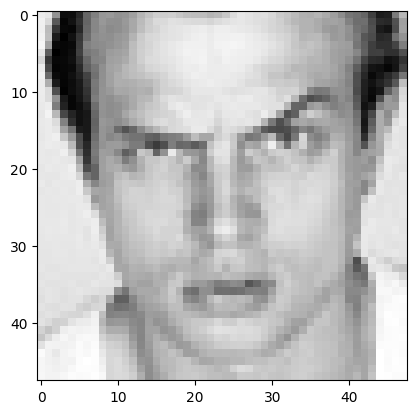

In [27]:
image = r"C:\Users\haris\OneDrive\Desktop\Computer Vision\test\angry\PrivateTest_1623042.jpg"
print("original image is of Angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 28ms/step
model prediction is  sad


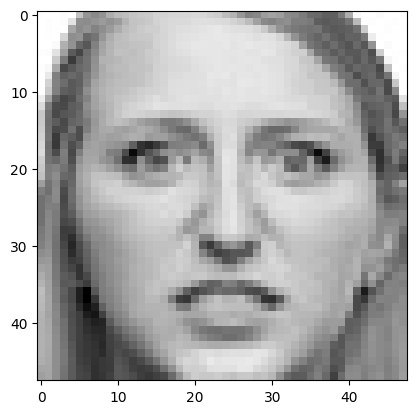

In [28]:
image = r'C:\Users\haris\OneDrive\Desktop\Computer Vision\test\fear\PrivateTest_623230.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 44ms/step
model prediction is  disgust


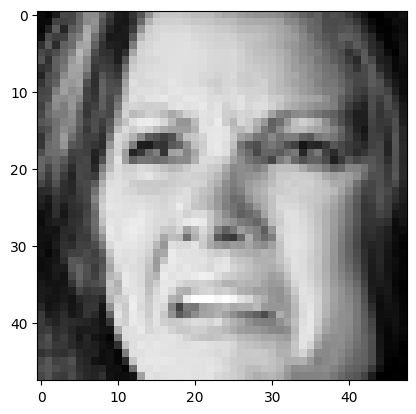

In [29]:
image = r"C:\Users\haris\OneDrive\Desktop\Computer Vision\test\disgust\PrivateTest_4783181.jpg"
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 27ms/step
model prediction is  happy


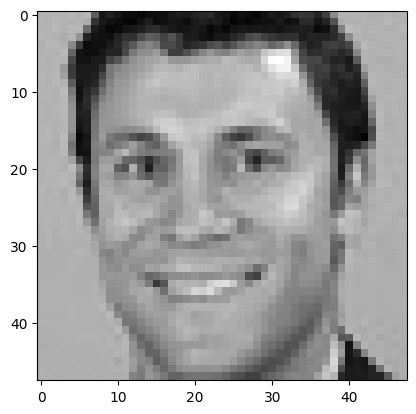

In [30]:
image = r"C:\Users\haris\OneDrive\Desktop\Computer Vision\test\happy\PrivateTest_928647.jpg"
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 35ms/step
model prediction is  surprise


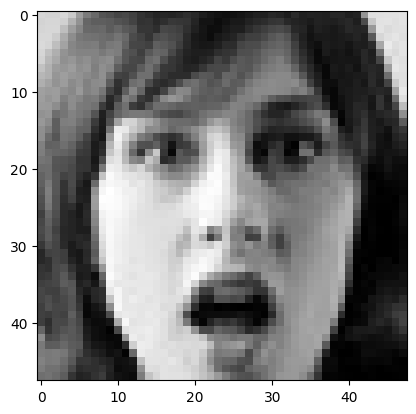

In [31]:
image = r"C:\Users\haris\OneDrive\Desktop\Computer Vision\test\surprise\PrivateTest_2034433.jpg"
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')